## Micro-Credit Defaulter Model

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [3]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Internship\\Micro Credit Project\\Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


### label -	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
### msisdn -	mobile number of user
### aon-	age on cellular network in days
### daily_decr30- 	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
### daily_decr90-	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
### rental30-	Average main account balance over last 30 days
### rental90-	Average main account balance over last 90 days
### last_rech_date_ma-	Number of days till last recharge of main account
### last_rech_date_da-	Number of days till last recharge of data account
### last_rech_amt_ma-	Amount of last recharge of main account (in Indonesian Rupiah)
### cnt_ma_rech30-	Number of times main account got recharged in last 30 days
### fr_ma_rech30-	Frequency of main account recharged in last 30 days
### sumamnt_ma_rech30-	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
### medianamnt_ma_rech30-	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
### medianmarechprebal30-	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
### cnt_ma_rech90-	Number of times main account got recharged in last 90 days
### fr_ma_rech90-	Frequency of main account recharged in last 90 days
### sumamnt_ma_rech90-	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
### medianamnt_ma_rech90-	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
### medianmarechprebal90-	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
### cnt_da_rech30-	Number of times data account got recharged in last 30 days
### fr_da_rech30-	Frequency of data account recharged in last 30 days
### cnt_da_rech90-	Number of times data account got recharged in last 90 days
### fr_da_rech90-	Frequency of data account recharged in last 90 days
### cnt_loans30-	Number of loans taken by user in last 30 days
### amnt_loans30-	Total amount of loans taken by user in last 30 days
### maxamnt_loans30-	maximum amount of loan taken by the user in last 30 days
### medianamnt_loans30-	Median of amounts of loan taken by the user in last 30 days
### cnt_loans90-	Number of loans taken by user in last 90 days
### amnt_loans90-	Total amount of loans taken by user in last 90 days
### maxamnt_loans90-	maximum amount of loan taken by the user in last 90 days
### medianamnt_loans90-	Median of amounts of loan taken by the user in last 90 days
### payback30-	Average payback time in days over last 30 days
### payback90-	Average payback time in days over last 90 days
### pcircle-	telecom circle
### pdate-	date

## EDA

In [4]:
df.shape

(209593, 37)

In [5]:
df.drop(['Unnamed: 0','msisdn','pdate'],axis=1,inplace=True)

### These 2 columns wont affect the output.

In [6]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
dtype: int64

### There are no missing values

In [7]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [8]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [9]:
### pcircle column can be dropped, since it has only one value.
df.drop(['pcircle'],axis=1,inplace=True)

<AxesSubplot:xlabel='label', ylabel='count'>

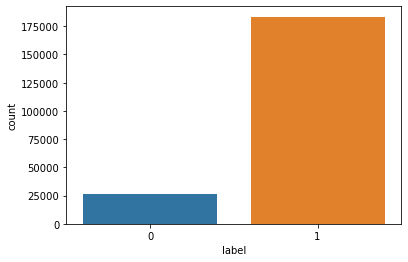

In [10]:
sns.countplot(df['label'])

### There is a class imbalance in the output which may leads the model to give priority to the greater class. We have make it balanced by doing sampling.

In [11]:
t=list(df.columns)
t.remove('label')

<AxesSubplot:xlabel='rental30', ylabel='daily_decr30'>

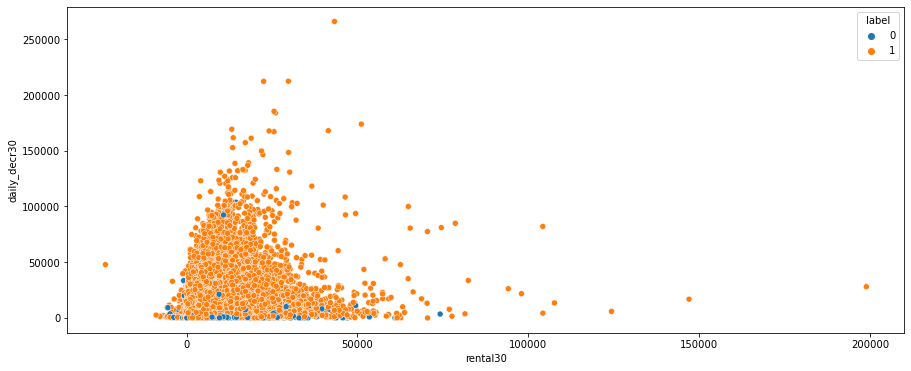

In [13]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['rental30'],y=df['daily_decr30'],hue=df['label'])

### The average main account balance is mostly in between 0 and 50000.
### Daily amount spent from main account, averaged over last 30 days is mostly between 0 and 100000.

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='daily_decr30'>

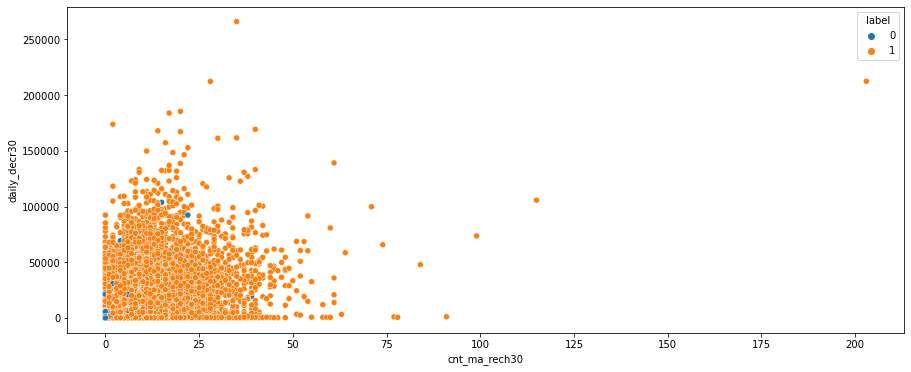

In [14]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['cnt_ma_rech30'],y=df['daily_decr30'],hue=df['label'])

### Number of times main account got recharged in last 30 days is mostly between 0 and 40, If the no. of times the customer recharged is more then the customer is a non-defaulter,

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='daily_decr30'>

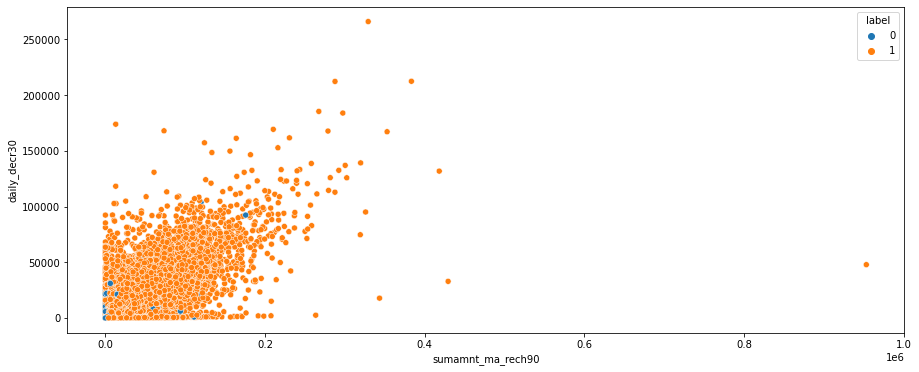

In [15]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['sumamnt_ma_rech90'],y=df['daily_decr30'],hue=df['label'])

### Total amount of recharge in main account over last 90 days is positively related to daily_decr30.

<AxesSubplot:xlabel='amnt_loans90', ylabel='payback90'>

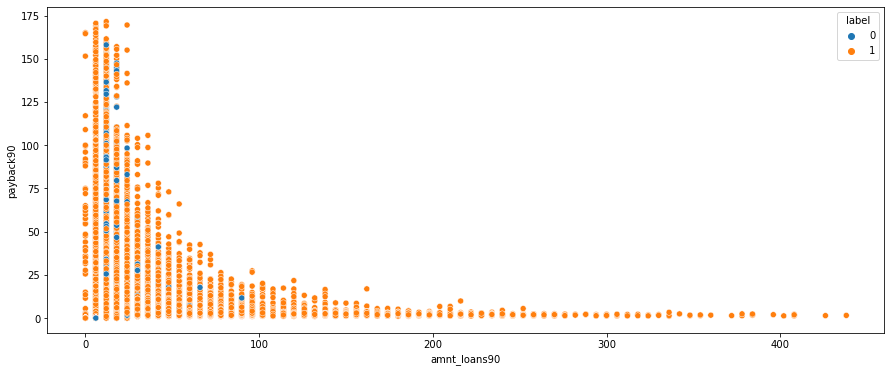

In [16]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['amnt_loans90'],y=df['payback90'],hue=df['label'])

### If the Total amount of loans taken by user in last 90 days is more then the Average payback time in days over last 90 days is less.

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='payback90'>

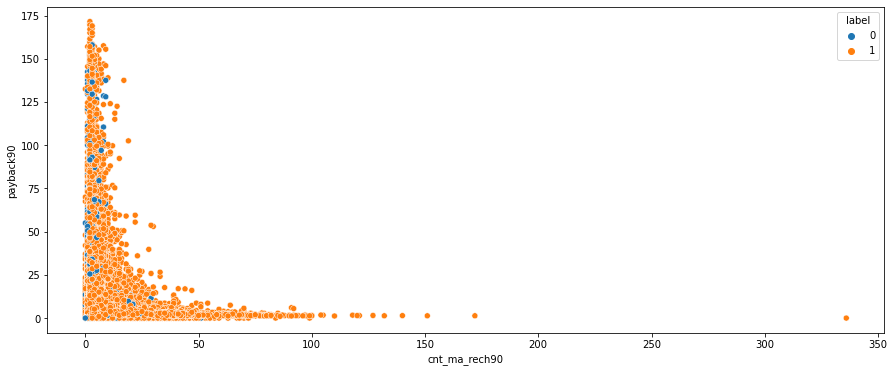

In [17]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['cnt_ma_rech90'],y=df['payback90'],hue=df['label'])

In [84]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_amt_ma        float64
cnt_ma_rech30           float64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90           float64
fr_ma_rech90            float64
sumamnt_ma_rech90       float64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_loans30             float64
amnt_loans30            float64
cnt_loans90             float64
amnt_loans90            float64
payback30               float64
payback90               float64
dtype: object

### There is no significant relation between these two columns.

<AxesSubplot:>

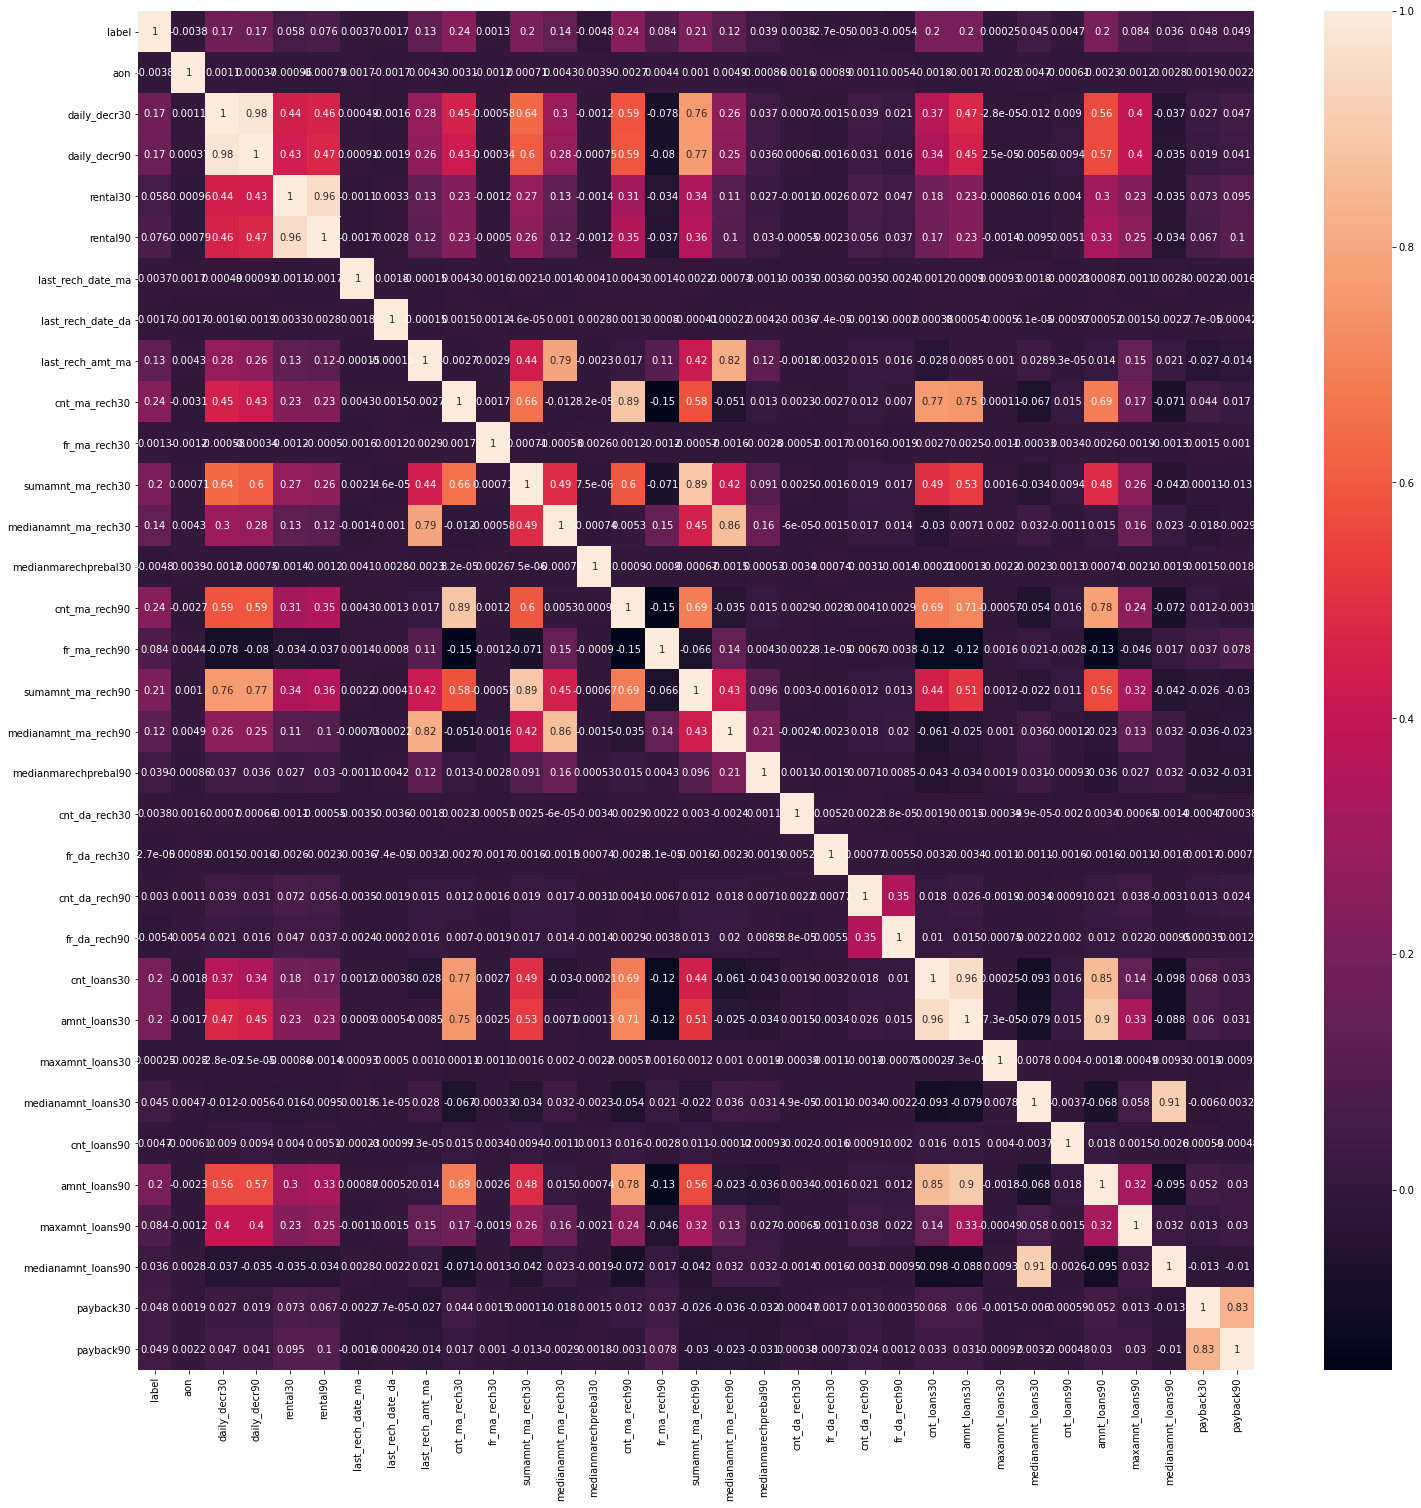

In [18]:
cor=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(cor,annot=True)

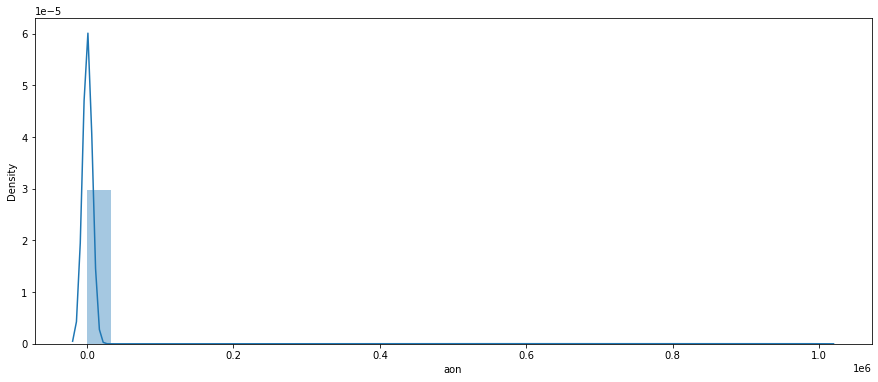

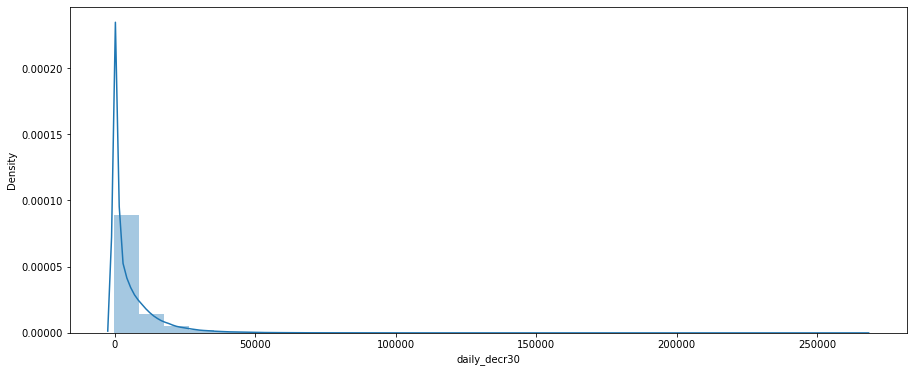

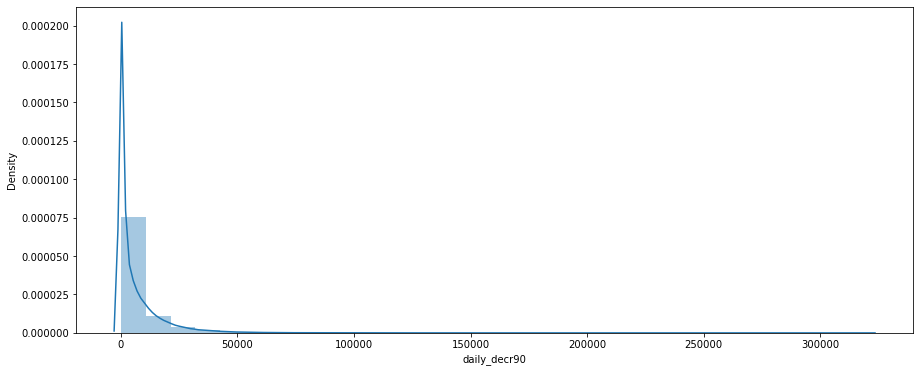

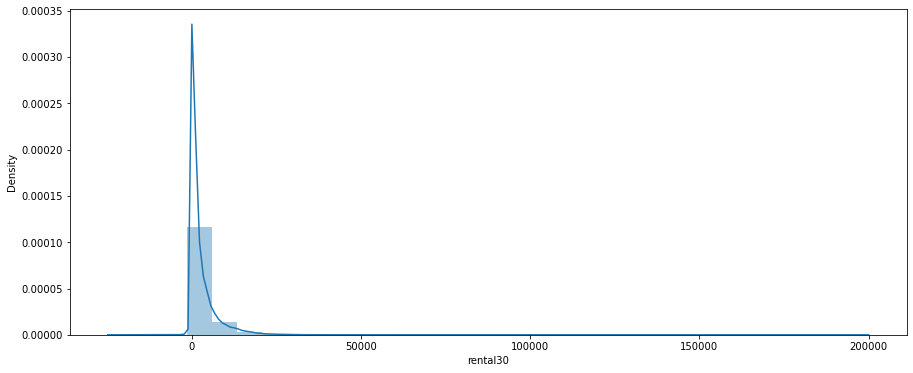

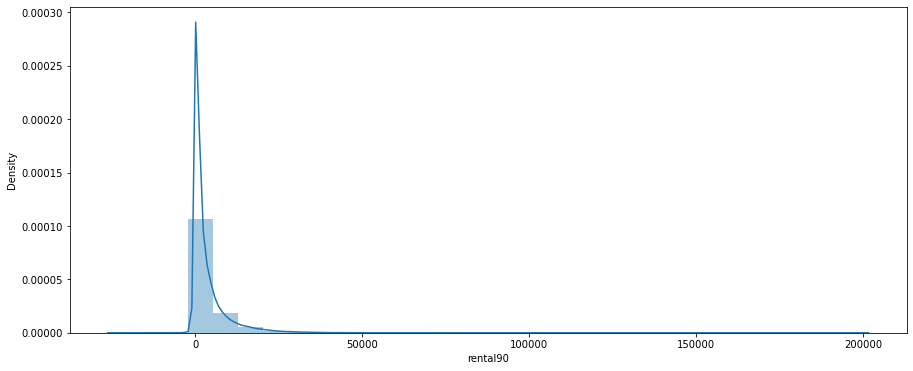

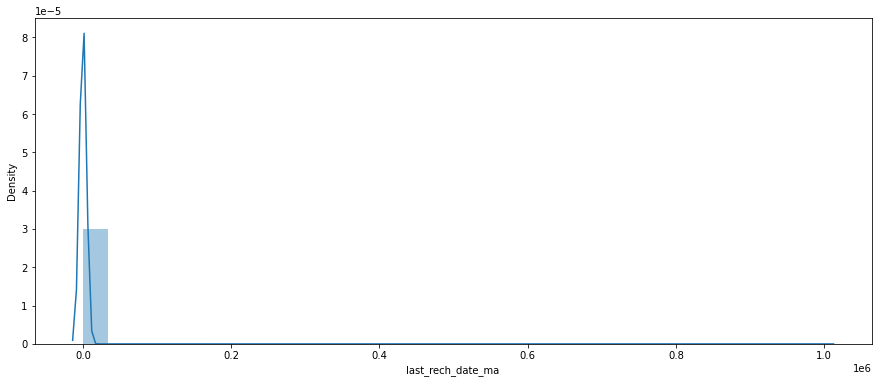

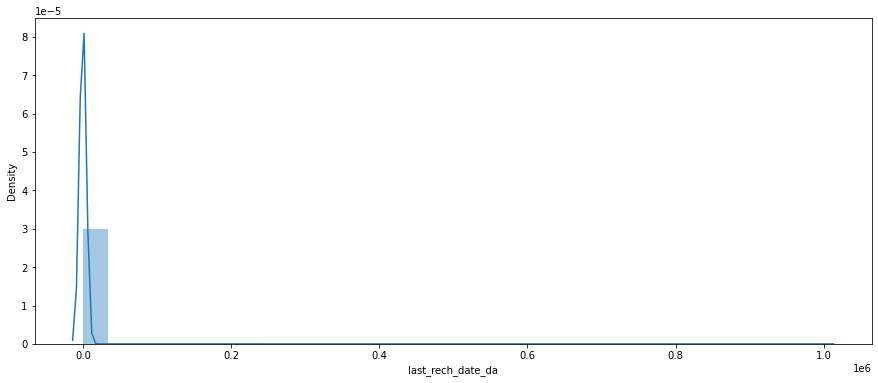

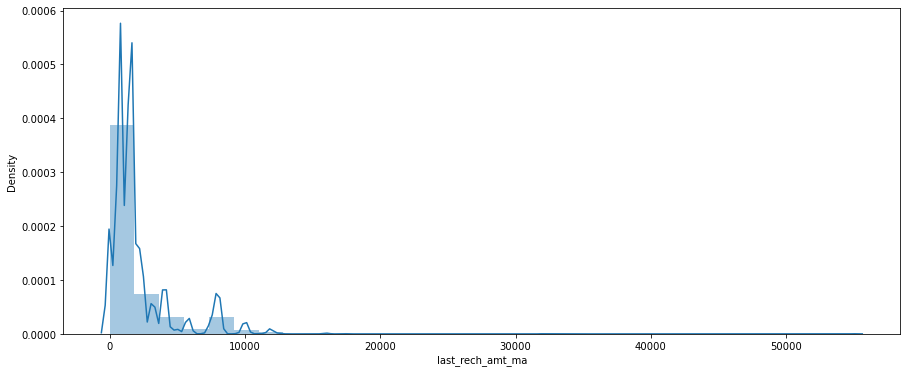

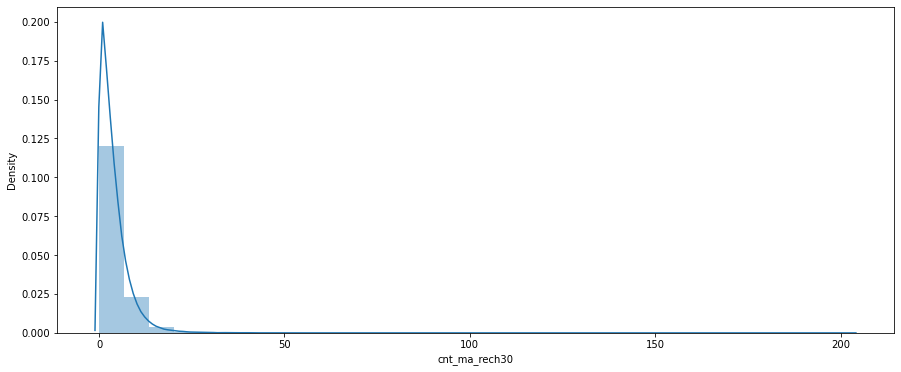

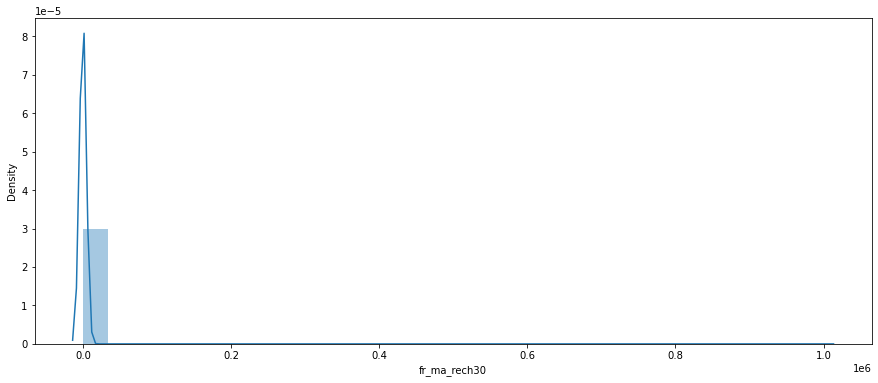

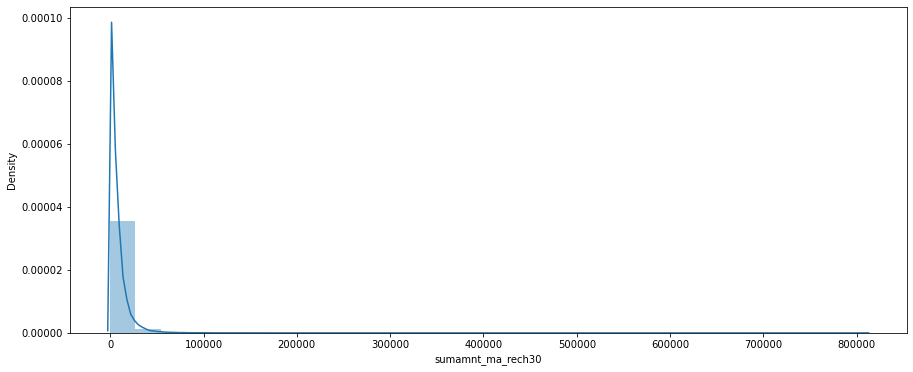

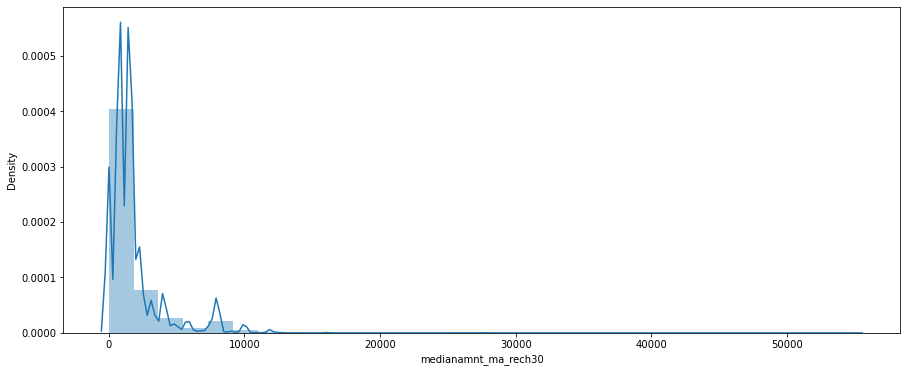

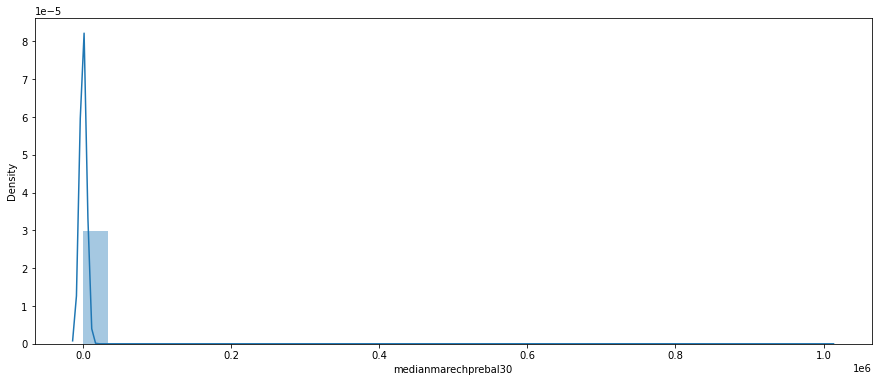

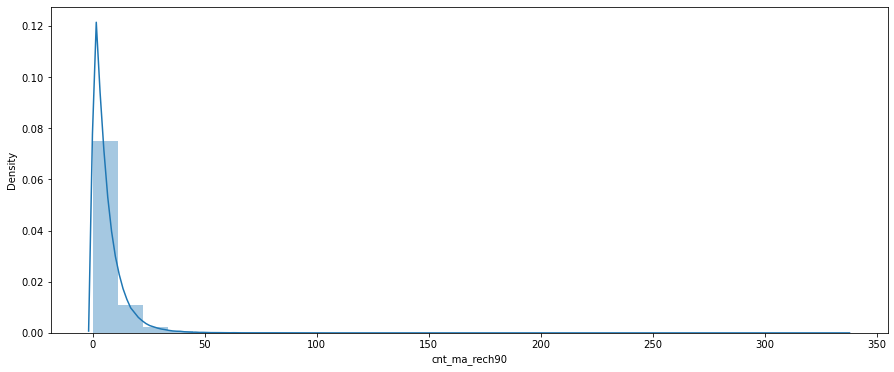

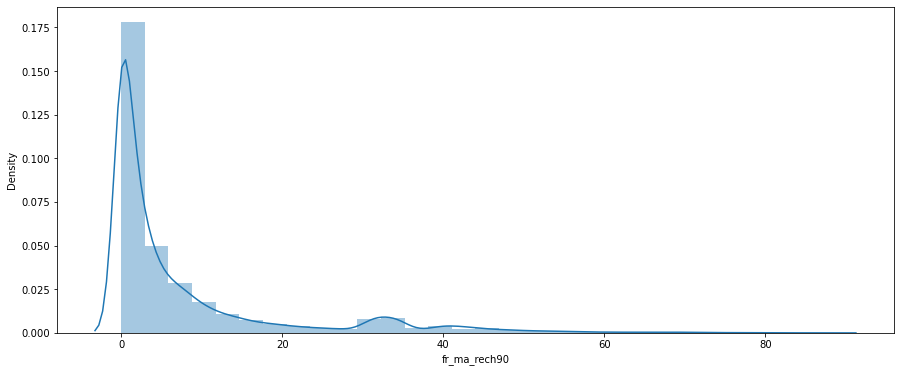

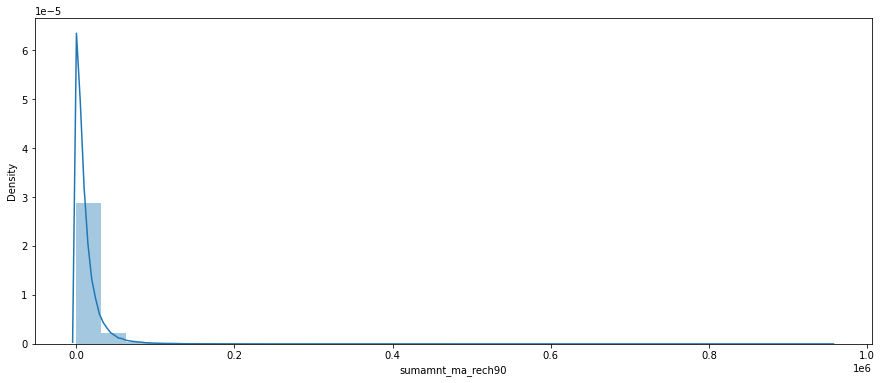

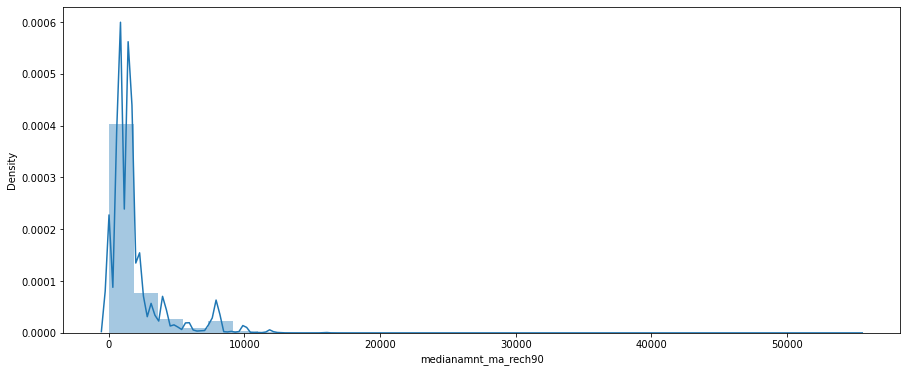

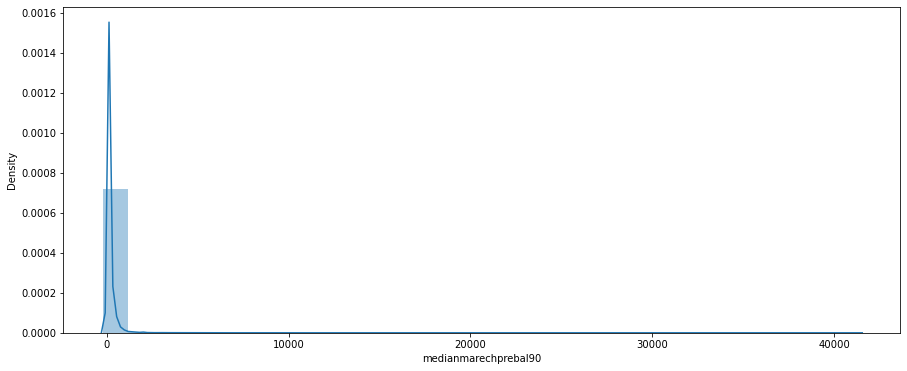

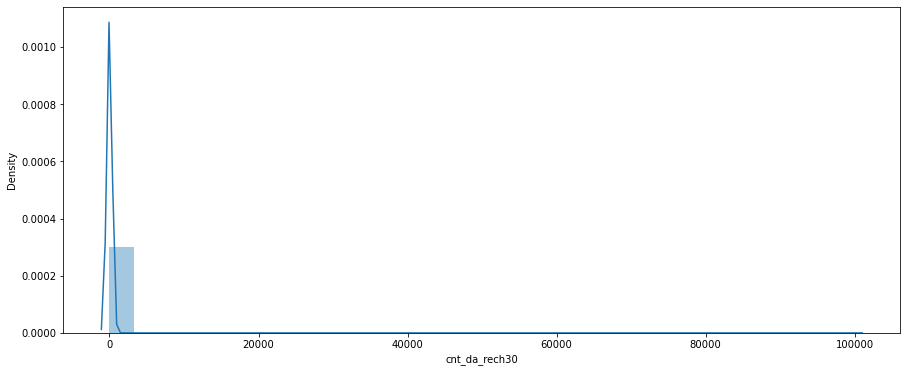

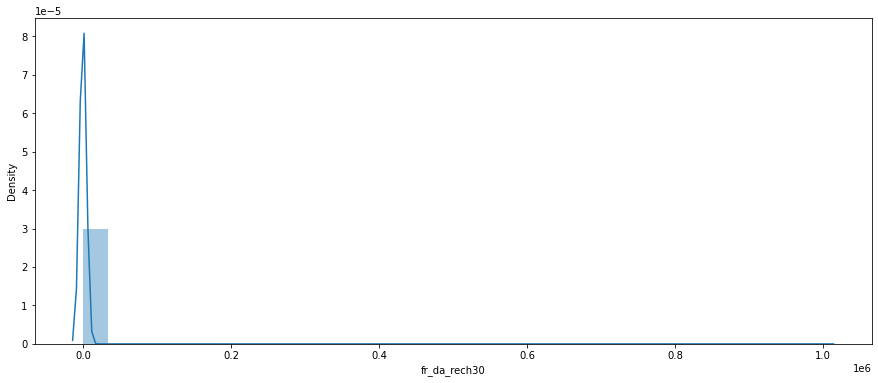

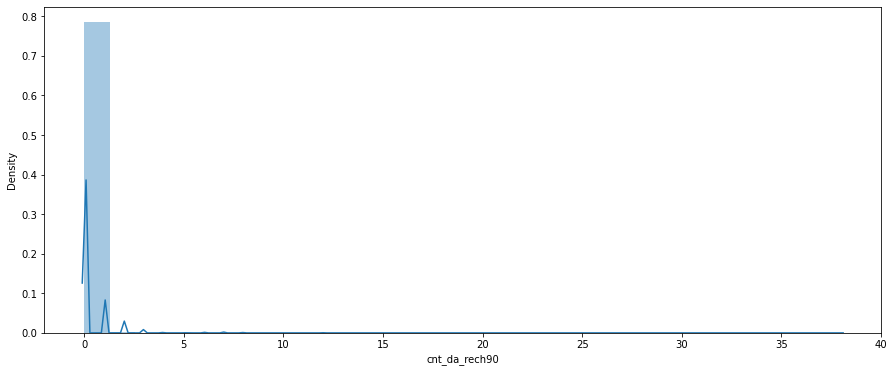

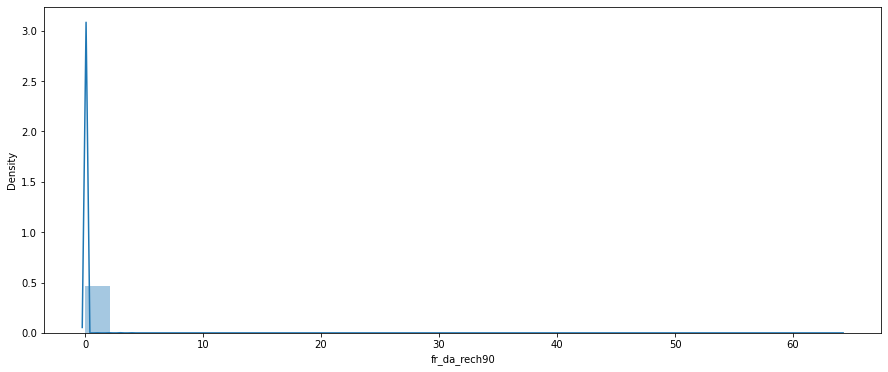

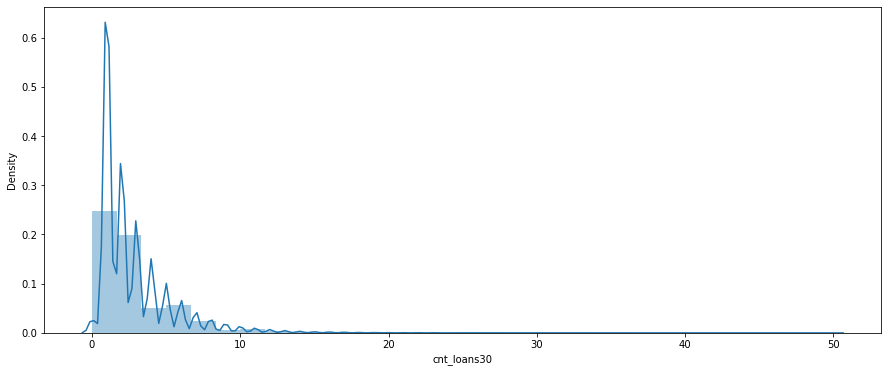

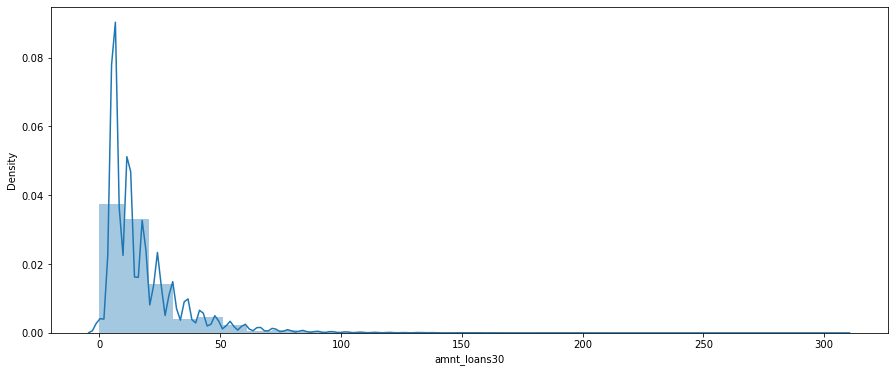

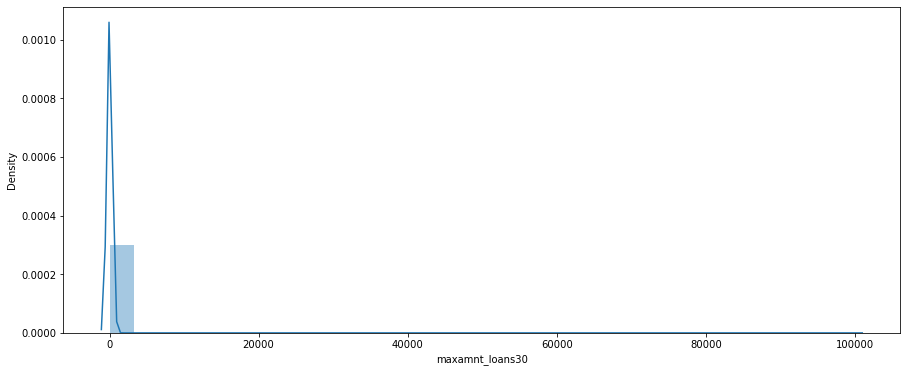

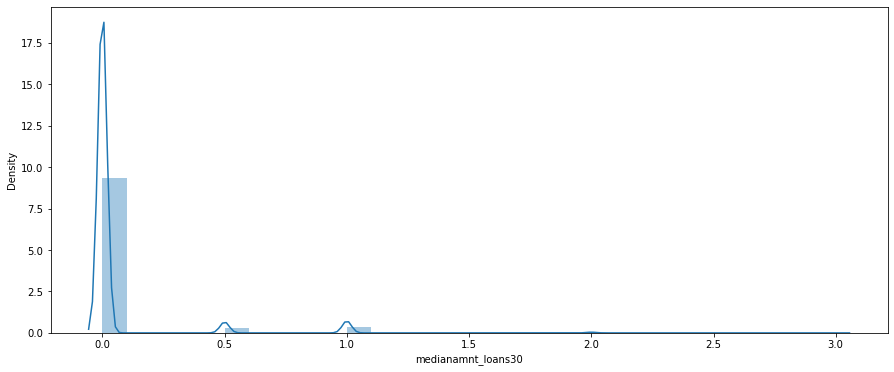

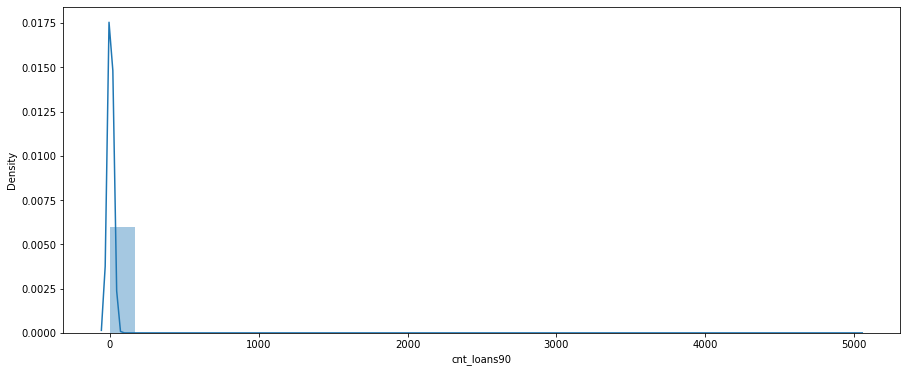

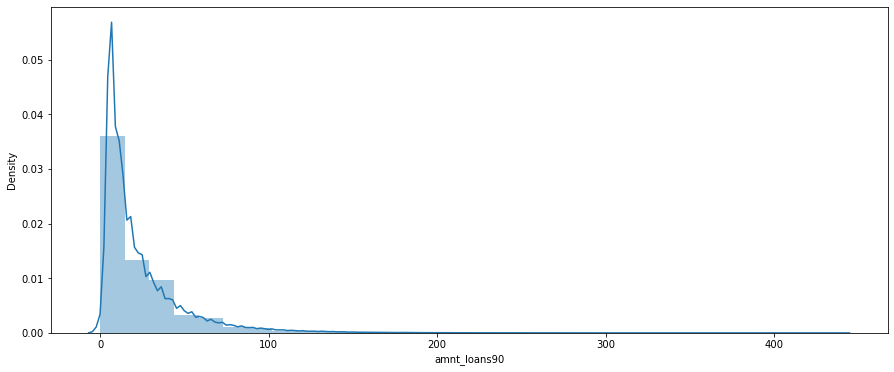

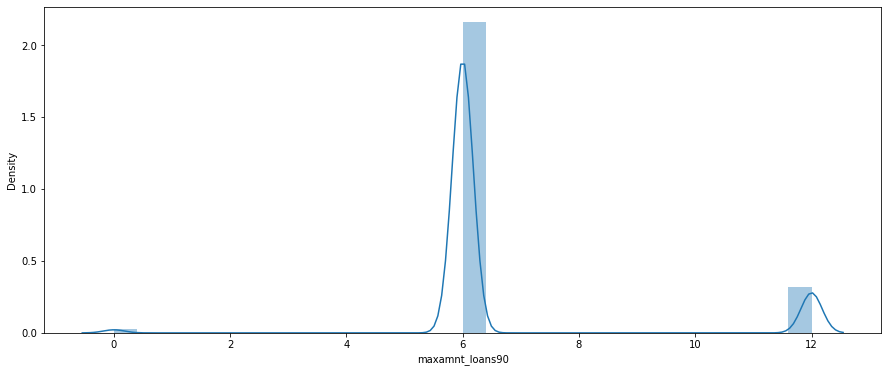

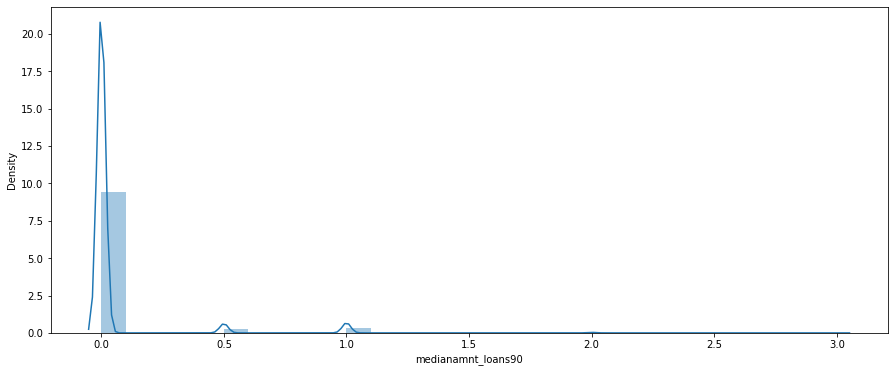

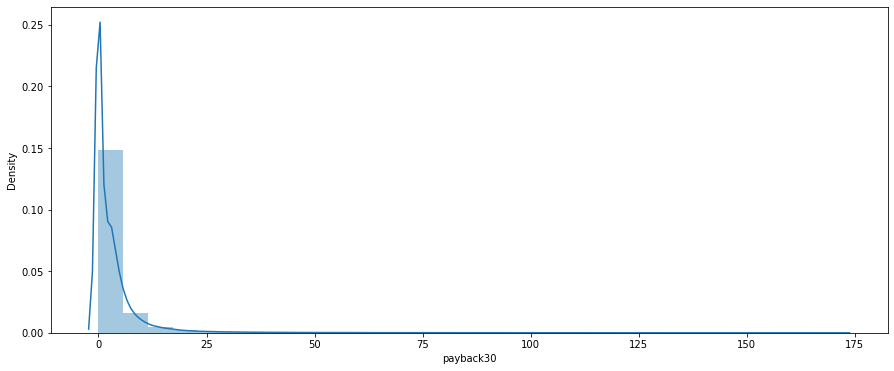

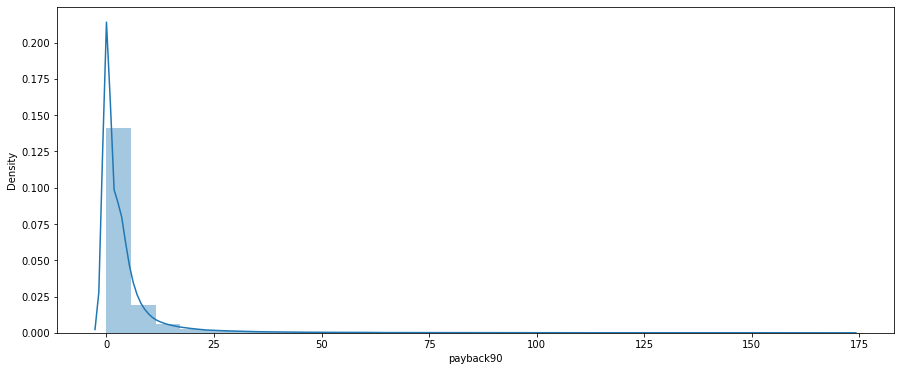

In [19]:
for i in t:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i],bins=30)

### There is skewness present in almost all the columns.

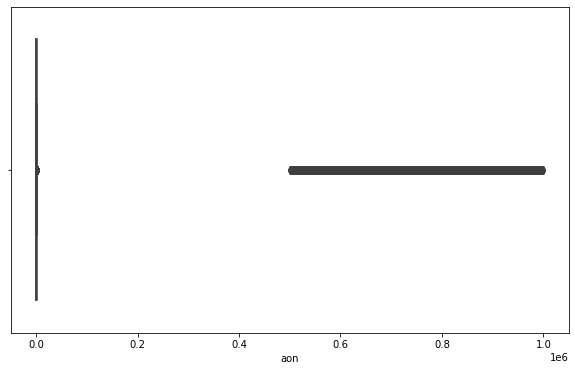

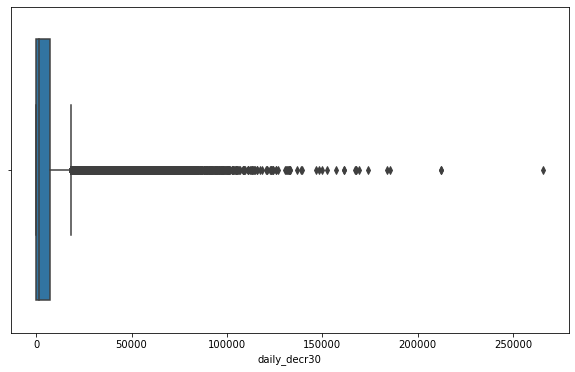

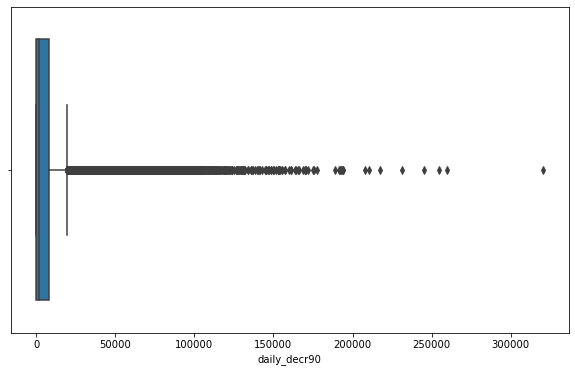

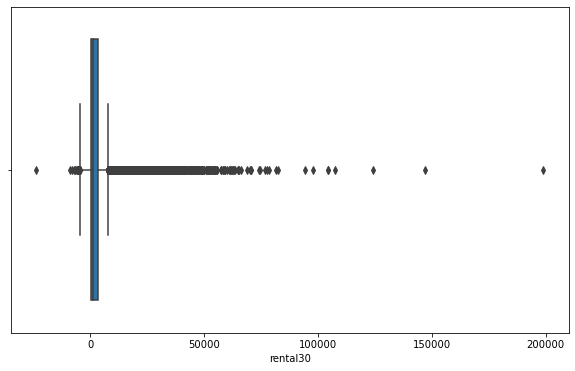

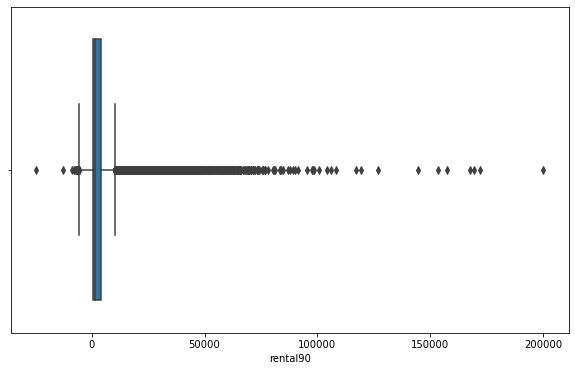

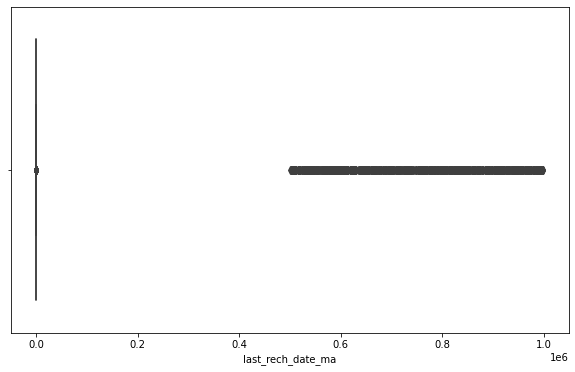

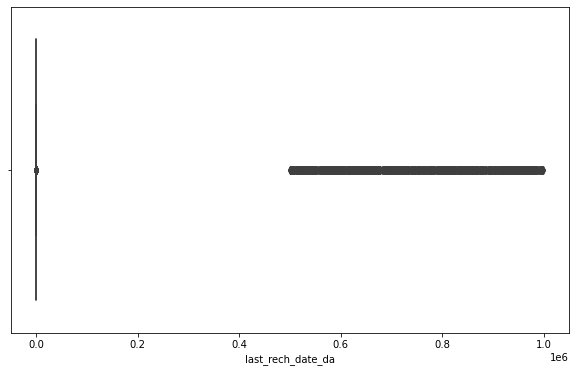

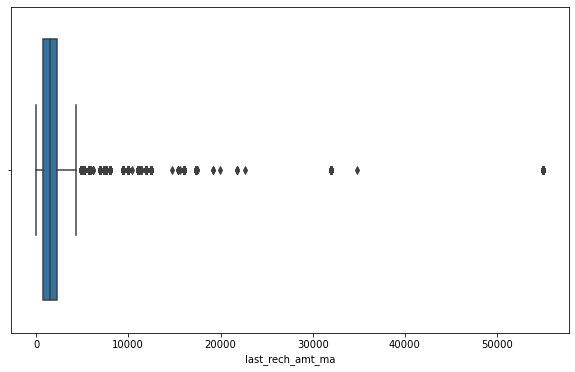

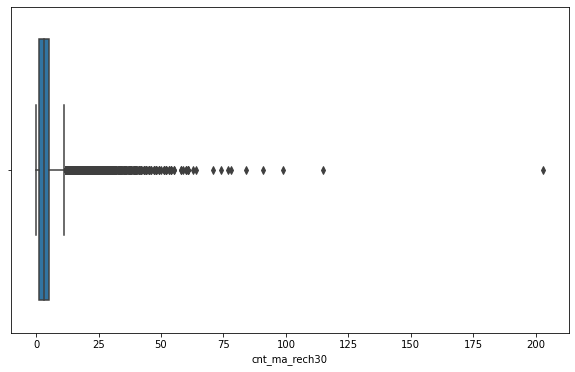

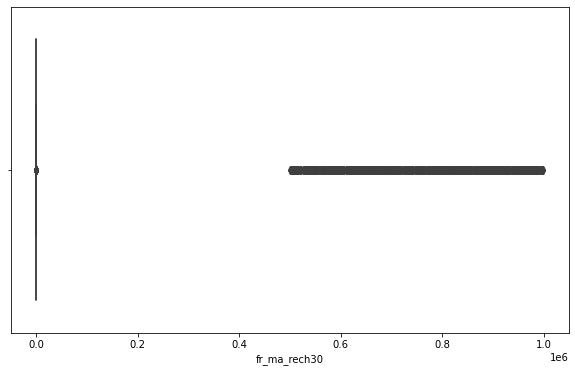

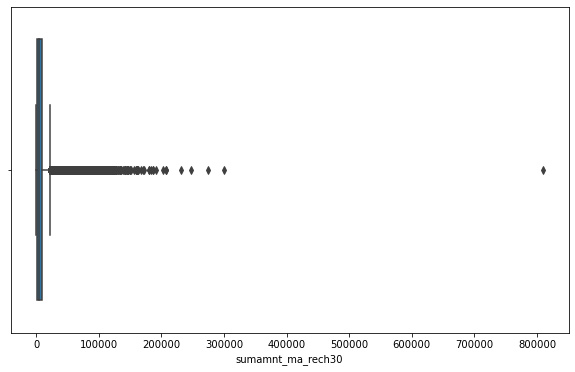

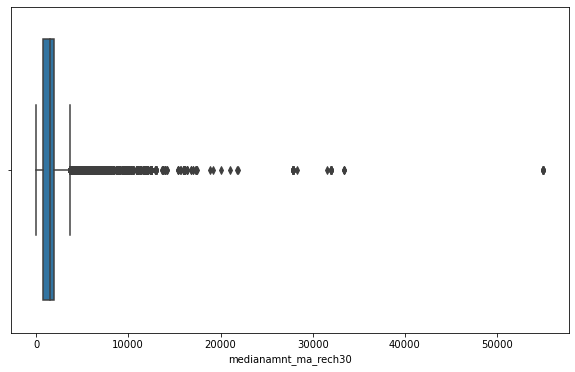

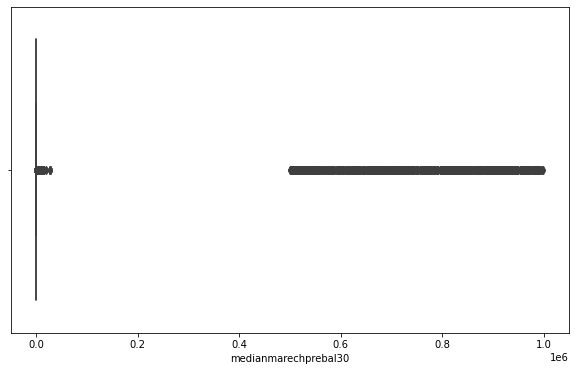

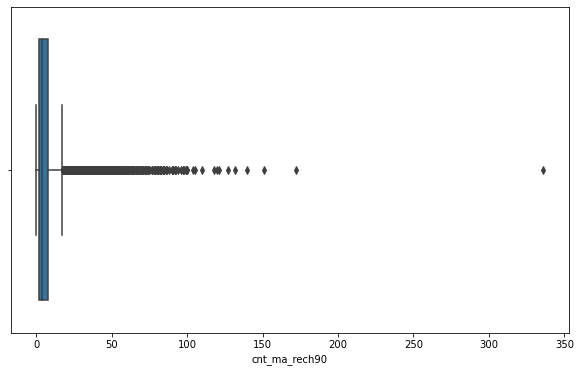

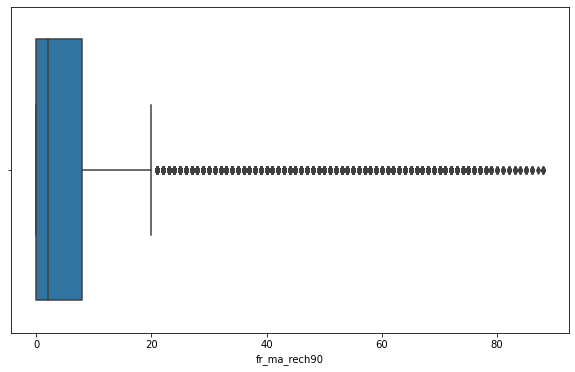

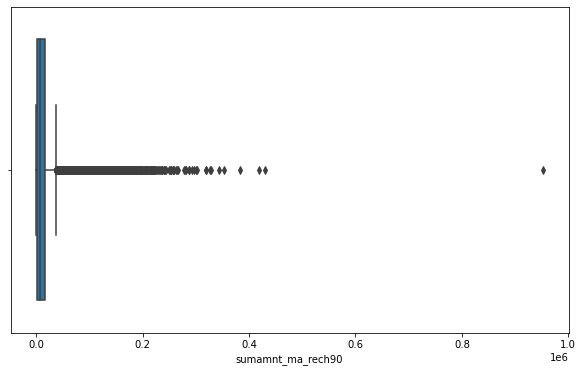

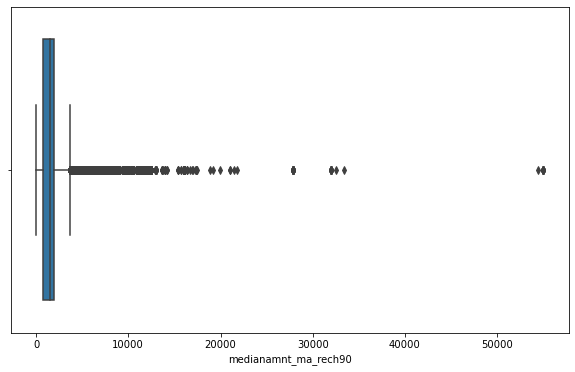

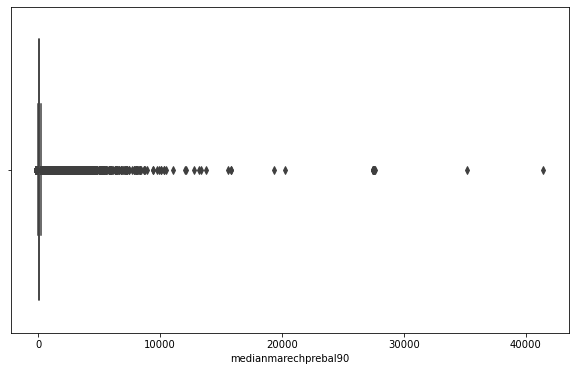

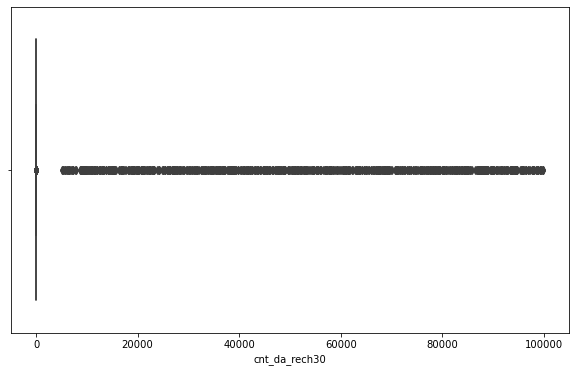

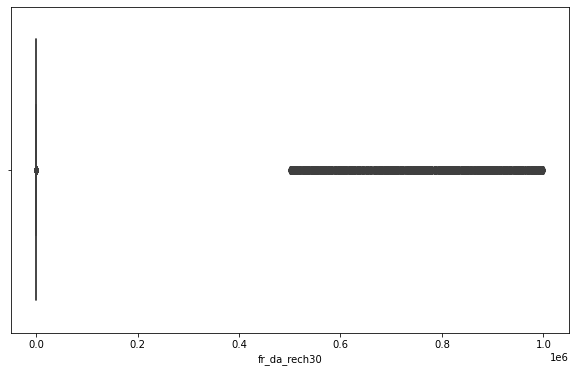

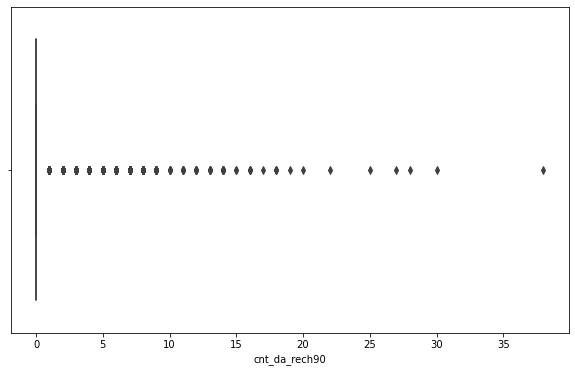

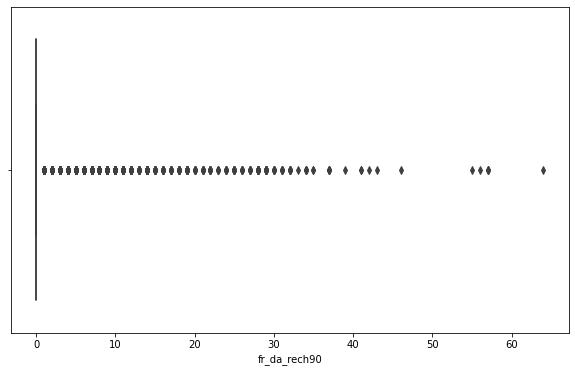

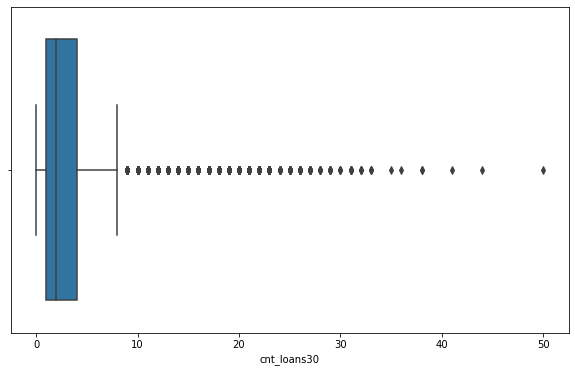

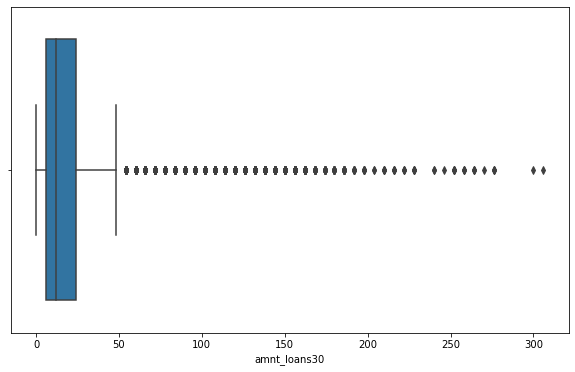

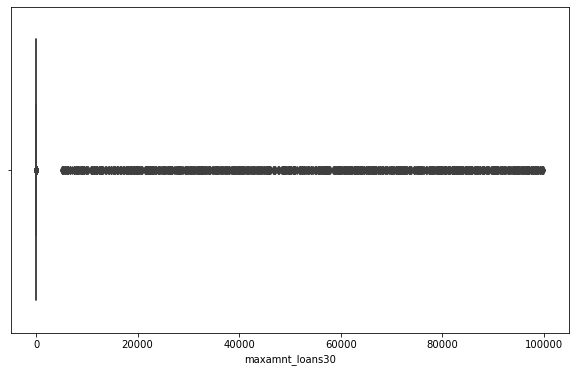

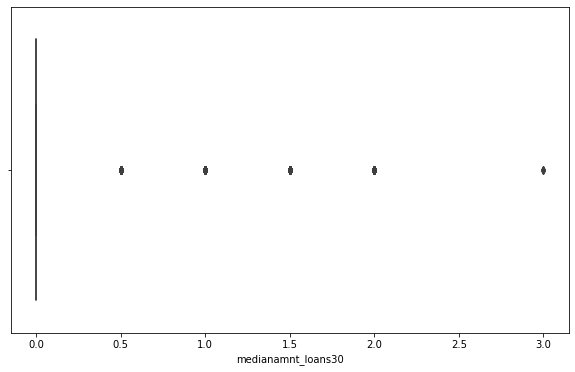

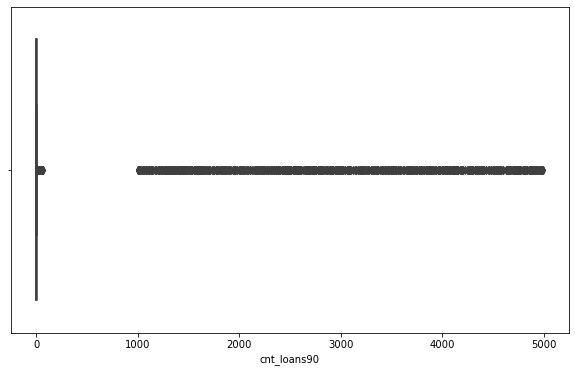

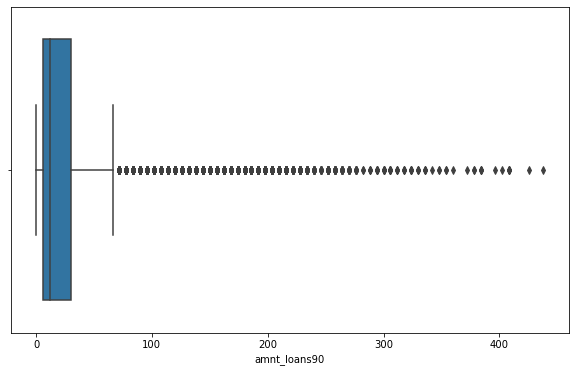

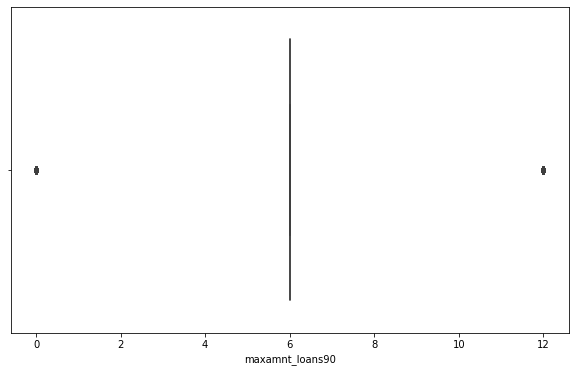

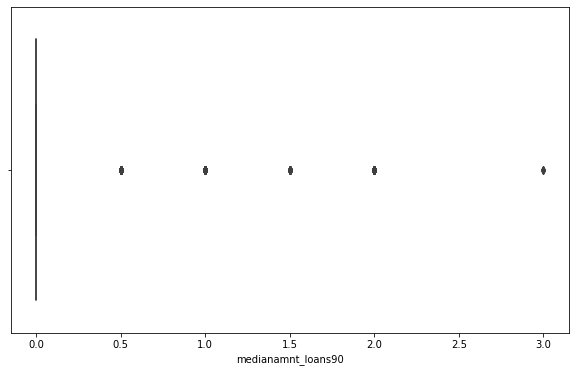

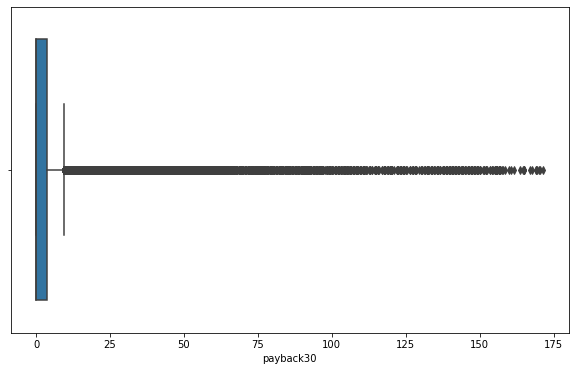

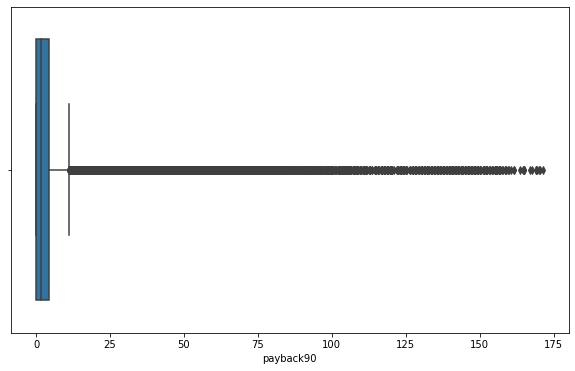

In [20]:
for i in t:
    plt.figure(figsize=(10,6))
    sns.boxplot(df[i])

### There are outliers present in all the columns.

## Outliers Removal

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
n_df=df[(z<3).all(axis=1)]
n_df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [22]:
n_df.shape

(161465, 33)

In [23]:
df.shape

(209593, 33)

In [24]:
dataloss=(209593-161465)/209593
dataloss*100

22.962598941758554

### Here, the dataloss is more than 8%, so we continue with the old data.

In [25]:
for i in t:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    outliers = df[(df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR)]
    
    fare_mean = df[i].mean()
    fare_std = df[i].std()
    low= fare_mean -(3 * fare_std)
    high= fare_mean + (3 * fare_std)
    fare_outliers = df[(df[i] < low) | (df[i] > high)]
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i]))

### Instead of eliminating the outliers, we have replaced the outliers higher than the upper whisker by the value of upper whisker and the outliers lower than the lower whisker by the value of lower whisker.

## Skewness

In [26]:
df.skew()

label                  -2.270254
aon                     0.947127
daily_decr30            1.239231
daily_decr90            1.238995
rental30                1.192510
rental90                1.193291
last_rech_date_ma       1.040301
last_rech_date_da       0.000000
last_rech_amt_ma        1.003446
cnt_ma_rech30           0.904157
fr_ma_rech30            1.253282
sumamnt_ma_rech30       1.080771
medianamnt_ma_rech30    0.728219
medianmarechprebal30    0.988628
cnt_ma_rech90           0.934789
fr_ma_rech90            1.172479
sumamnt_ma_rech90       1.126421
medianamnt_ma_rech90    0.763904
medianmarechprebal90    0.957933
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             1.340348
amnt_loans30            1.231090
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             1.281861
amnt_loans90            1.217940
maxamnt_loans90         0.000000
medianamnt

In [27]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
f=['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','maxamnt_loans30','medianamnt_loans30',
   'maxamnt_loans90','medianamnt_loans90']
final_list = list(set(t) - set(f))

In [28]:
final_list

['payback90',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'medianamnt_ma_rech30',
 'aon',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'rental90',
 'sumamnt_ma_rech30',
 'cnt_loans90',
 'amnt_loans30',
 'fr_ma_rech30',
 'cnt_loans30',
 'cnt_ma_rech30',
 'payback30',
 'last_rech_date_ma',
 'daily_decr90',
 'last_rech_amt_ma',
 'sumamnt_ma_rech90',
 'medianmarechprebal30',
 'daily_decr30',
 'amnt_loans90',
 'rental30']

In [29]:
for i in final_list:
    df[i] = pt.fit_transform(np.array(df[i]).reshape(-1,1))[:,0]

In [30]:
df.skew()

label                  -2.270254
aon                     0.303288
daily_decr30           -5.145302
daily_decr90           -5.361851
rental30                0.133157
rental90                0.083529
last_rech_date_ma      -0.125348
last_rech_date_da       0.000000
last_rech_amt_ma       -0.336663
cnt_ma_rech30          -0.033368
fr_ma_rech30            0.118452
sumamnt_ma_rech30      -0.452785
medianamnt_ma_rech30   -0.555924
medianmarechprebal30    0.054210
cnt_ma_rech90          -0.040754
fr_ma_rech90            0.091461
sumamnt_ma_rech90      -0.356097
medianamnt_ma_rech90   -0.430848
medianmarechprebal90    0.179317
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.044046
amnt_loans30            0.005370
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             0.092294
amnt_loans90           -0.000218
maxamnt_loans90         0.000000
medianamnt

In [31]:
df.drop(f,axis=1,inplace=True)

In [32]:
df.shape

(209593, 24)

In [33]:
x=df.drop(['label'],axis=1)
y=df['label']

## VIF

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.030373,aon
1,282.357704,daily_decr30
2,292.292163,daily_decr90
3,15.564745,rental30
4,16.968624,rental90
5,1.451385,last_rech_date_ma
6,5.822927,last_rech_amt_ma
7,34.889996,cnt_ma_rech30
8,2.114049,fr_ma_rech30
9,54.309549,sumamnt_ma_rech30


In [35]:
x.drop(['daily_decr90'],axis=1,inplace=True)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.030372,aon
1,2.421106,daily_decr30
2,14.966237,rental30
3,16.263698,rental90
4,1.449911,last_rech_date_ma
5,5.820105,last_rech_amt_ma
6,34.889902,cnt_ma_rech30
7,2.113730,fr_ma_rech30
8,53.103250,sumamnt_ma_rech30
9,13.256440,medianamnt_ma_rech30


In [37]:
x.drop(['sumamnt_ma_rech30'],axis=1,inplace=True)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.030310,aon
1,2.420971,daily_decr30
2,14.847991,rental30
3,16.148723,rental90
4,1.445437,last_rech_date_ma
5,5.725851,last_rech_amt_ma
6,11.373474,cnt_ma_rech30
7,2.089744,fr_ma_rech30
8,5.111458,medianamnt_ma_rech30
9,3.829862,medianmarechprebal30


In [39]:
x.drop(['amnt_loans30'],axis=1,inplace=True)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.030013,aon
1,2.404924,daily_decr30
2,14.847675,rental30
3,16.140975,rental90
4,1.444535,last_rech_date_ma
5,5.725070,last_rech_amt_ma
6,11.314563,cnt_ma_rech30
7,2.089636,fr_ma_rech30
8,5.107772,medianamnt_ma_rech30
9,3.829787,medianmarechprebal30


In [41]:
x.drop(['cnt_loans90'],axis=1,inplace=True)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.029251,aon
1,2.388080,daily_decr30
2,14.845613,rental30
3,16.140839,rental90
4,1.442924,last_rech_date_ma
5,5.724268,last_rech_amt_ma
6,11.201690,cnt_ma_rech30
7,2.089636,fr_ma_rech30
8,5.104281,medianamnt_ma_rech30
9,3.829778,medianmarechprebal30


In [43]:
x.drop(['cnt_ma_rech90'],axis=1,inplace=True)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.026443,aon
1,2.386463,daily_decr30
2,14.641430,rental30
3,15.894750,rental90
4,1.375805,last_rech_date_ma
5,5.703215,last_rech_amt_ma
6,5.756162,cnt_ma_rech30
7,2.089623,fr_ma_rech30
8,4.951536,medianamnt_ma_rech30
9,3.812704,medianmarechprebal30


In [45]:
x.drop(['rental90'],axis=1,inplace=True)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.026435,aon
1,2.345578,daily_decr30
2,1.389980,rental30
3,1.374170,last_rech_date_ma
4,5.694849,last_rech_amt_ma
5,5.714457,cnt_ma_rech30
6,2.089577,fr_ma_rech30
7,4.949473,medianamnt_ma_rech30
8,3.812591,medianmarechprebal30
9,1.904807,fr_ma_rech90


In [47]:
x.drop(['sumamnt_ma_rech90'],axis=1,inplace=True)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.026145,aon
1,2.081035,daily_decr30
2,1.387504,rental30
3,1.372304,last_rech_date_ma
4,5.442452,last_rech_amt_ma
5,2.873704,cnt_ma_rech30
6,2.089402,fr_ma_rech30
7,4.868785,medianamnt_ma_rech30
8,3.809963,medianmarechprebal30
9,1.894417,fr_ma_rech90


In [49]:
x.drop(['amnt_loans90'],axis=1,inplace=True)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.024123,aon
1,1.770811,daily_decr30
2,1.377617,rental30
3,1.371384,last_rech_date_ma
4,5.441565,last_rech_amt_ma
5,2.873541,cnt_ma_rech30
6,2.088030,fr_ma_rech30
7,4.867738,medianamnt_ma_rech30
8,3.809519,medianmarechprebal30
9,1.889395,fr_ma_rech90


In [51]:
x.drop(['medianamnt_ma_rech90'],axis=1,inplace=True)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.024056,aon
1,1.765524,daily_decr30
2,1.377545,rental30
3,1.351242,last_rech_date_ma
4,3.523285,last_rech_amt_ma
5,2.840420,cnt_ma_rech30
6,2.087982,fr_ma_rech30
7,3.590422,medianamnt_ma_rech30
8,3.720708,medianmarechprebal30
9,1.878245,fr_ma_rech90


In [53]:
x.drop(['payback30'],axis=1,inplace=True)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.023624,aon
1,1.743631,daily_decr30
2,1.377542,rental30
3,1.340558,last_rech_date_ma
4,3.517055,last_rech_amt_ma
5,2.834384,cnt_ma_rech30
6,2.018157,fr_ma_rech30
7,3.582998,medianamnt_ma_rech30
8,3.714689,medianmarechprebal30
9,1.856545,fr_ma_rech90


### Here for all the columns, VIF score is less than 5. Therefore, Multi-Collinearity is not there.

## Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,cnt_loans30,payback90
0,-0.735565,0.367566,-0.740999,-0.477820,0.119205,-0.316955,1.567144,0.283404,-0.742257,1.476222,-0.806806,0.001617,1.518911
1,0.219699,1.219776,0.633961,1.931827,1.664764,-0.836948,-1.125983,1.524702,0.121475,-1.210839,0.154849,-0.921755,-1.025751
2,-0.130534,0.003800,-0.430601,-0.249233,0.119205,-0.836948,-1.125983,0.283404,0.198935,-1.210839,0.241613,-0.921755,-1.025751
3,-0.817761,-1.061698,-0.772499,1.931827,-0.349345,-1.655740,-1.125983,-2.007066,-0.898884,-1.210839,-0.916502,0.001617,-1.025751
4,0.642736,-0.705185,-0.347145,-0.037768,0.600459,1.079957,0.156274,0.800631,-0.370930,-0.076360,-0.288207,1.643691,0.428191


## Sampling

In [56]:
from imblearn.over_sampling import SMOTE
smo=SMOTE()
x,y=smo.fit_resample(x,y)

In [57]:
y.value_counts()

0    183431
1    183431
Name: label, dtype: int64

## Choosing Random State Value

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
maxac=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    sam=DecisionTreeClassifier()
    sam.fit(x_train,y_train)
    pred=sam.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxran=i
print('max accuracy=',maxac,'ran state=',maxran)

max accuracy= 0.8885012197947474 ran state= 17


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxran)

## Model Selection

### Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
dtc_clas1=classification_report(y_test,pred1)
acc1=accuracy_score(y_test,pred1)
print(acc1)
print(dtc_clas1)

0.8875608193749744
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     36755
           1       0.89      0.88      0.89     36618

    accuracy                           0.89     73373
   macro avg       0.89      0.89      0.89     73373
weighted avg       0.89      0.89      0.89     73373



In [61]:
from sklearn.metrics import confusion_matrix
con1=confusion_matrix(y_test,pred1)
con1

array([[32982,  3773],
       [ 4477, 32141]], dtype=int64)

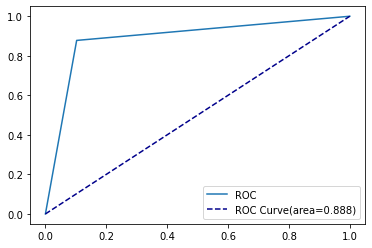

In [62]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds =roc_curve(y_test, pred1)
area_under_curve=roc_auc_score(y_test, pred1)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred2=rfc.predict(x_test)
rfc_clas2=classification_report(y_test,pred2)
acc2=accuracy_score(y_test,pred2)
print(acc2)
print(rfc_clas2)

0.940400419772941
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     36755
           1       0.94      0.94      0.94     36618

    accuracy                           0.94     73373
   macro avg       0.94      0.94      0.94     73373
weighted avg       0.94      0.94      0.94     73373



In [64]:
con2=confusion_matrix(y_test,pred2)
con2

array([[34731,  2024],
       [ 2349, 34269]], dtype=int64)

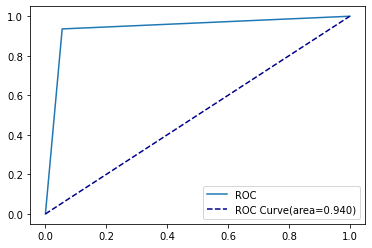

In [65]:
fpr, tpr, thresholds =roc_curve(y_test, pred2)
area_under_curve=roc_auc_score(y_test, pred2)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### KNN 

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
knn1.fit(x_train,y_train)
pred3=knn1.predict(x_test)
kn_clas3=classification_report(y_test,pred3)
acc3=accuracy_score(y_test,pred3)
print(acc3)
print(kn_clas3)

0.8829405912256553
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     36755
           1       0.98      0.78      0.87     36618

    accuracy                           0.88     73373
   macro avg       0.90      0.88      0.88     73373
weighted avg       0.90      0.88      0.88     73373



In [67]:
con3=confusion_matrix(y_test,pred3)
con3

array([[36191,   564],
       [ 8025, 28593]], dtype=int64)

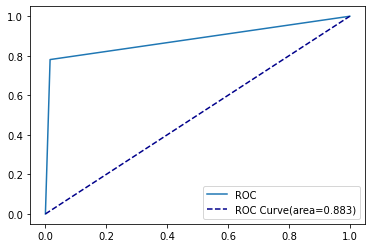

In [68]:
fpr, tpr, thresholds =roc_curve(y_test, pred3)
area_under_curve=roc_auc_score(y_test, pred3)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred4=lr.predict(x_test)
lr_clas4=classification_report(y_test,pred4)
acc4=accuracy_score(y_test,pred4)
print(acc4)
print(lr_clas4)

0.7611655513608548
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     36755
           1       0.76      0.77      0.76     36618

    accuracy                           0.76     73373
   macro avg       0.76      0.76      0.76     73373
weighted avg       0.76      0.76      0.76     73373



In [70]:
con4=confusion_matrix(y_test,pred4)
con4

array([[27823,  8932],
       [ 8592, 28026]], dtype=int64)

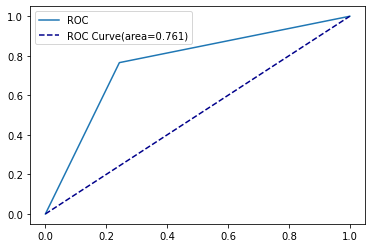

In [71]:
fpr, tpr, thresholds =roc_curve(y_test, pred4)
area_under_curve=roc_auc_score(y_test, pred4)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

## Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
cv1=cross_val_score(dtc,x,y,cv=7).mean()
cv2=cross_val_score(rfc,x,y,cv=7).mean()
cv3=cross_val_score(knn1,x,y,cv=7).mean()
cv4=cross_val_score(lr,x,y,cv=7).mean()
print(cv1,cv2,cv3,cv4)

0.8861834057975295 0.9405662585738762 0.8866985457397233 0.7614171087017675


In [75]:
print(abs(acc1-cv1),abs(acc2-cv2),abs(acc3-cv3),abs(acc4-cv4))

0.0013774135774449192 0.00016583880093523629 0.003757954514068018 0.0002515573409126448


### We can choose Random Forest as our model since its cv_score and accuracy score are almost similar.

## Hyper Parameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV
parameters={'oob_score':[True,False],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],
           'bootstrap':[True,False]}
gsc=GridSearchCV(rfc,parameters)
gsc.fit(x_train,y_train)
print(gsc.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}


In [78]:
fin_default_model=RandomForestClassifier(bootstrap= False, criterion='entropy', max_features= 'sqrt',oob_score= False)
fin_default_model.fit(x_train,y_train)
pred5=fin_default_model.predict(x_test)
rfc_acc=accuracy_score(y_test,pred5)
print("Final_Accuracy:",rfc_acc*100)

Final_Accuracy: 94.57293554849878


In [79]:
con5=confusion_matrix(y_test,pred5)
con5

array([[34767,  1988],
       [ 1994, 34624]], dtype=int64)

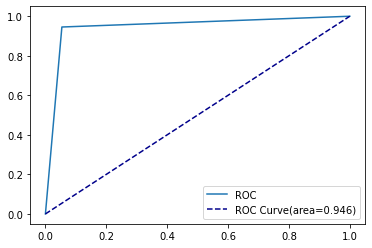

In [80]:
fpr, tpr, thresholds =roc_curve(y_test, pred5)
area_under_curve=roc_auc_score(y_test, pred5)
# Print ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

## Saving the Model

In [81]:
import joblib
joblib.dump(fin_default_model,'Final_default_mod.pkl')

['Final_default_mod.pkl']